<a href="https://colab.research.google.com/github/imSomnathM/Week-2/blob/main/Crop_Recommendation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Impoting libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Crop_recommendation_cleaned.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


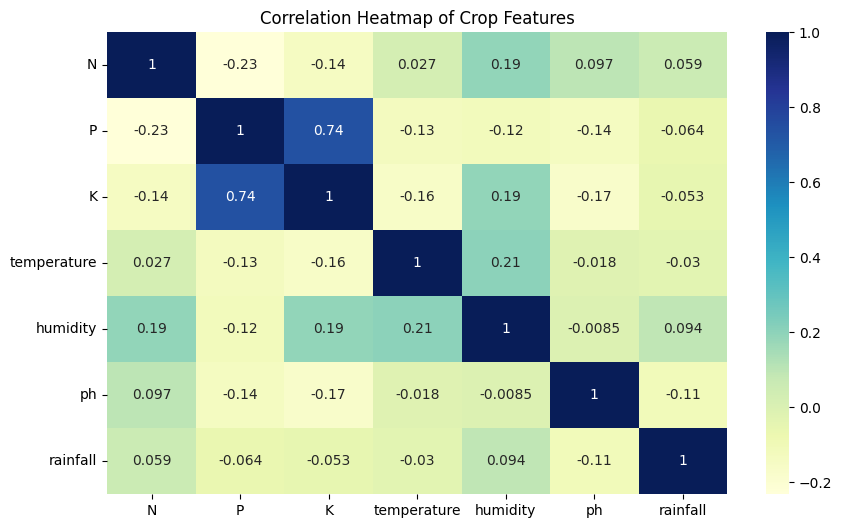

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Crop Features")
plt.show()

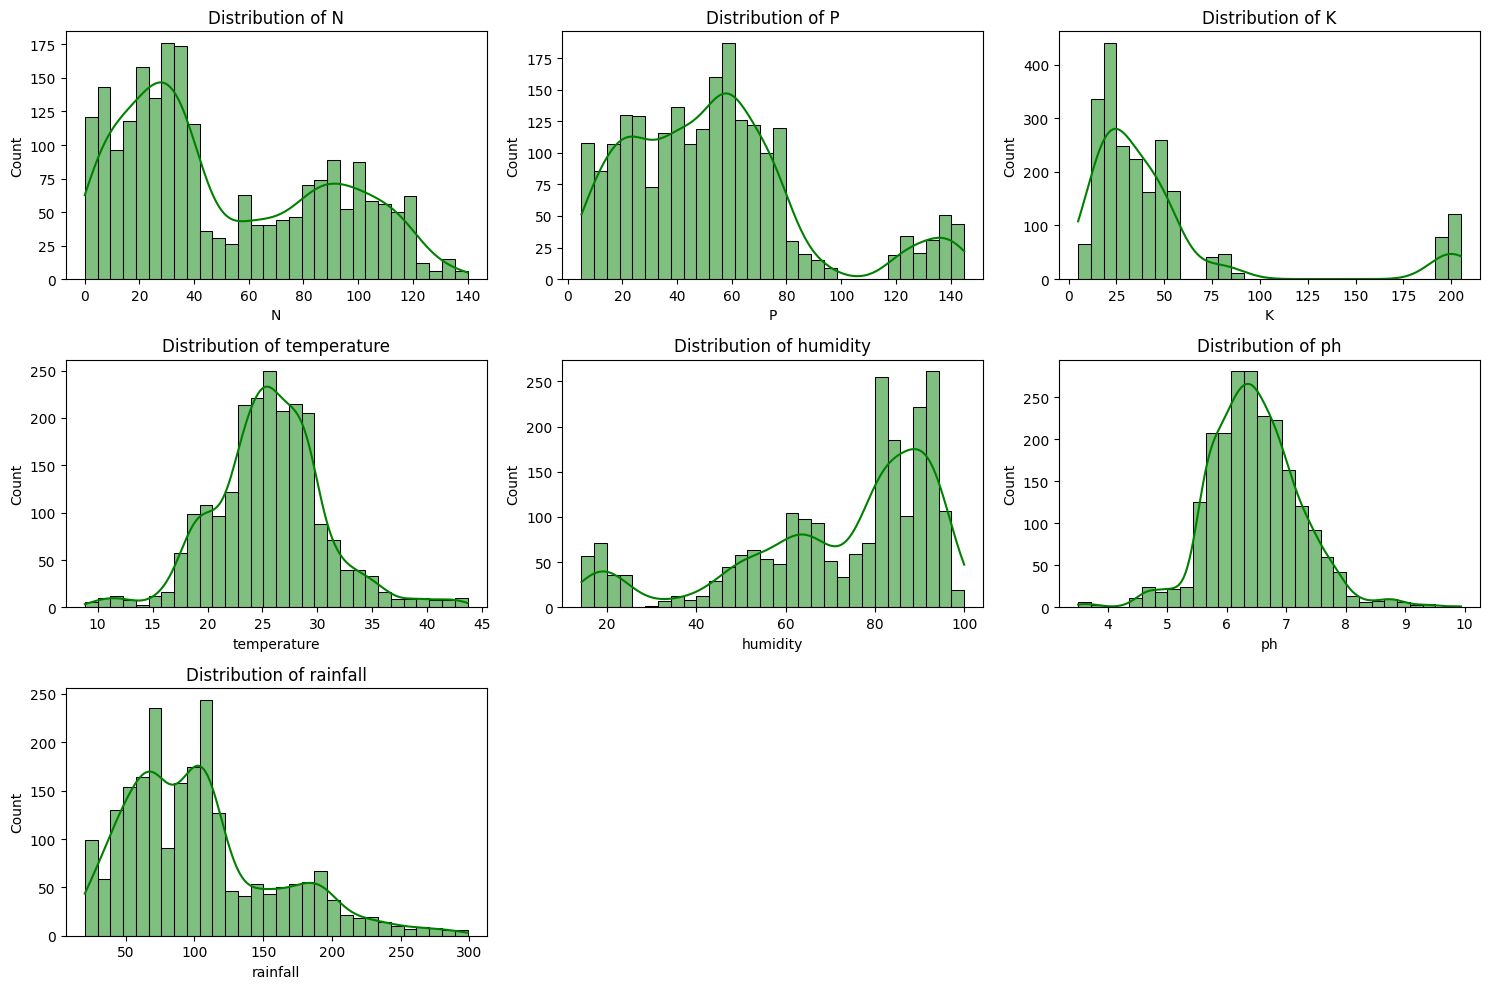

In [20]:
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="green")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1338045411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df['label'].value_counts().index, palette="Set2")


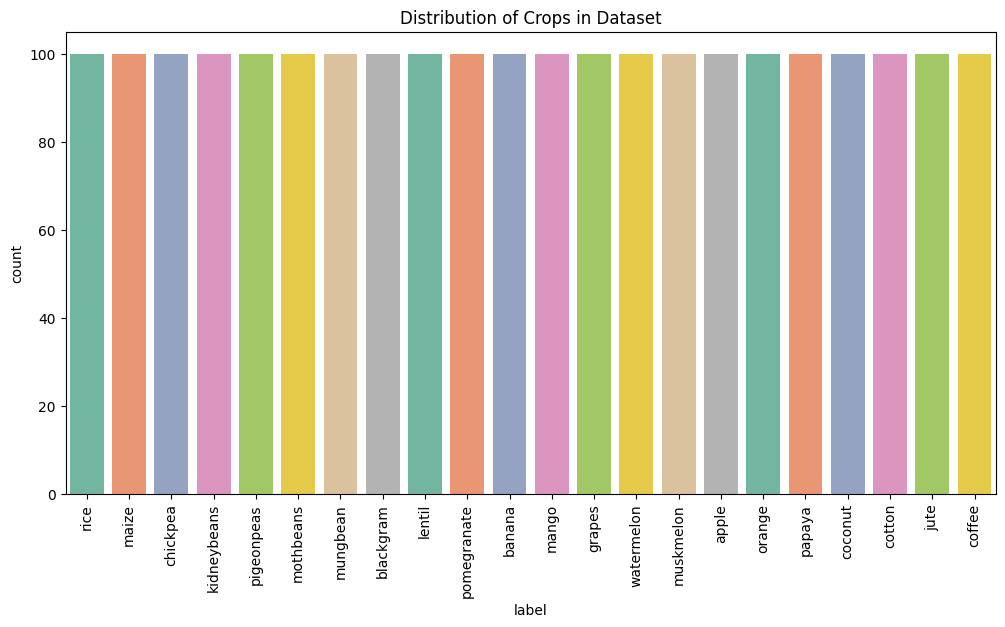

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="label", order=df['label'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Distribution of Crops in Dataset")
plt.show()

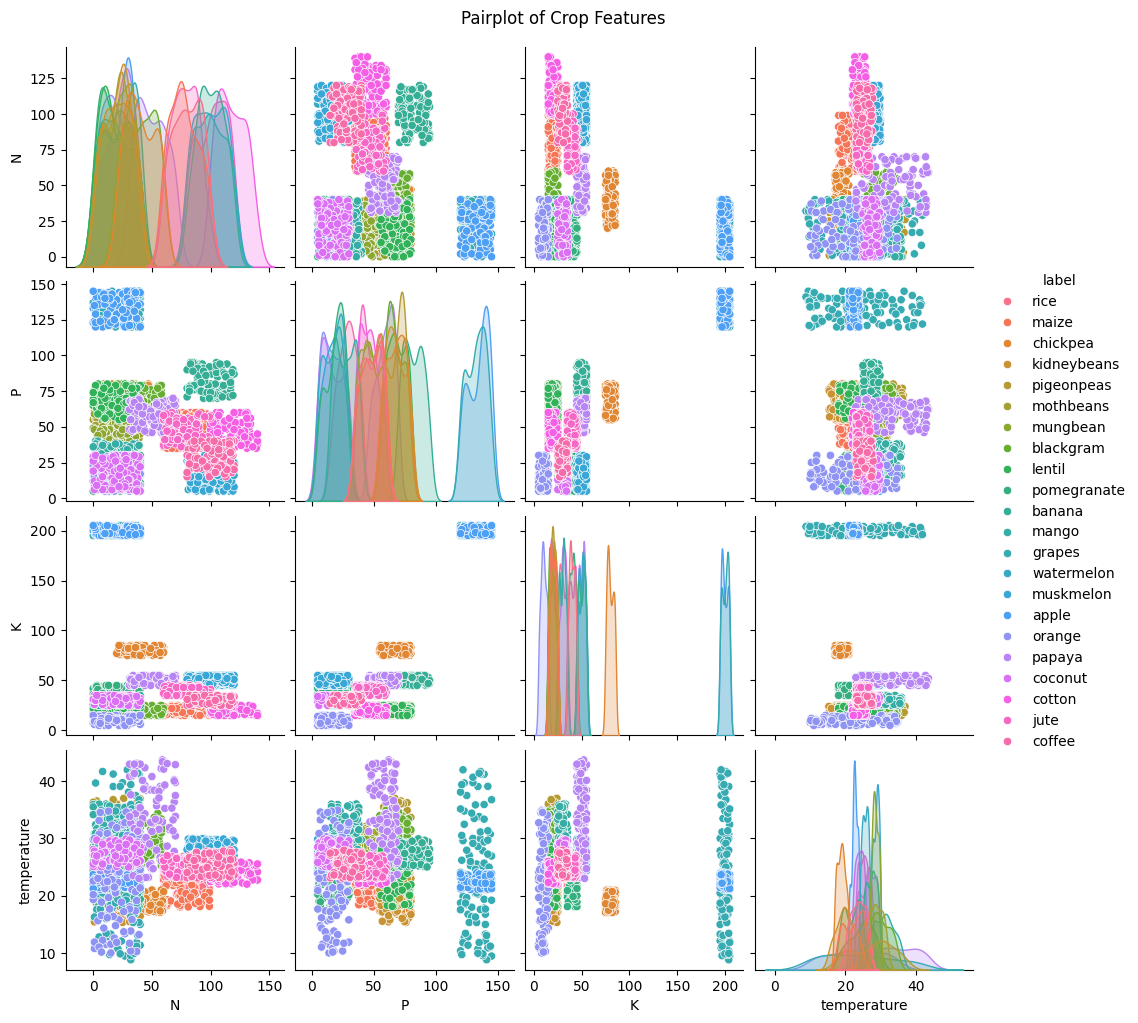

In [22]:
sns.pairplot(df[["N","P","K","temperature","label"]], hue="label", diag_kind="kde")
plt.suptitle("Pairplot of Crop Features", y=1.02)
plt.show()

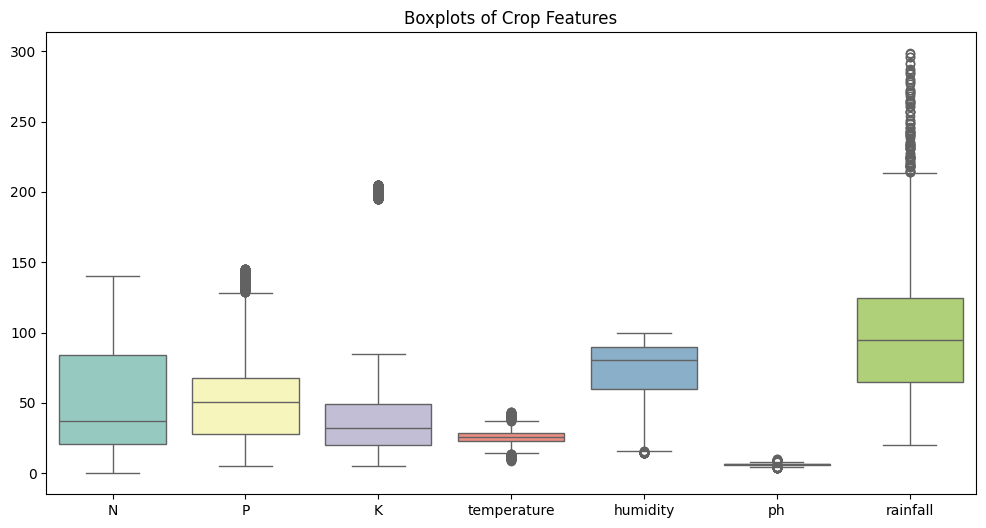

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["N","P","K","temperature","humidity","ph","rainfall"]], palette="Set3")
plt.title("Boxplots of Crop Features")
plt.show()

# **Adding KMeans clustering visualization**

impoerting libraries

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

applying Elbow method

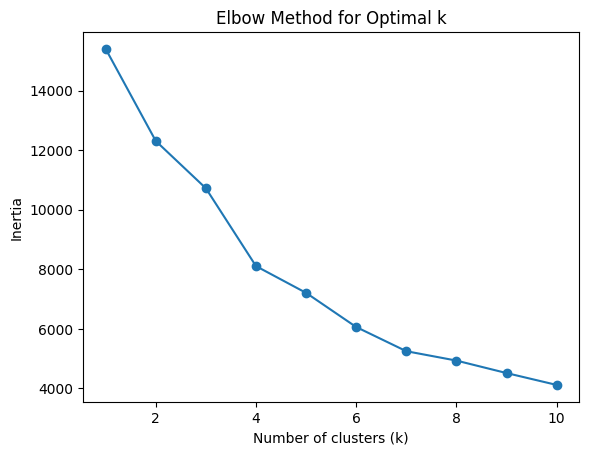

In [27]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

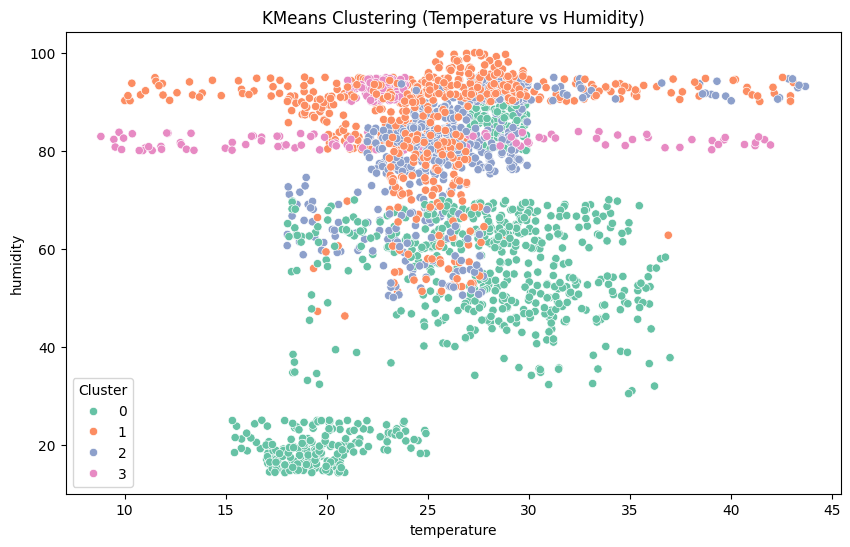

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)  # example with k=4
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["temperature"], y=df["humidity"], hue=df["Cluster"], palette="Set2")
plt.title("KMeans Clustering (Temperature vs Humidity)")
plt.show()

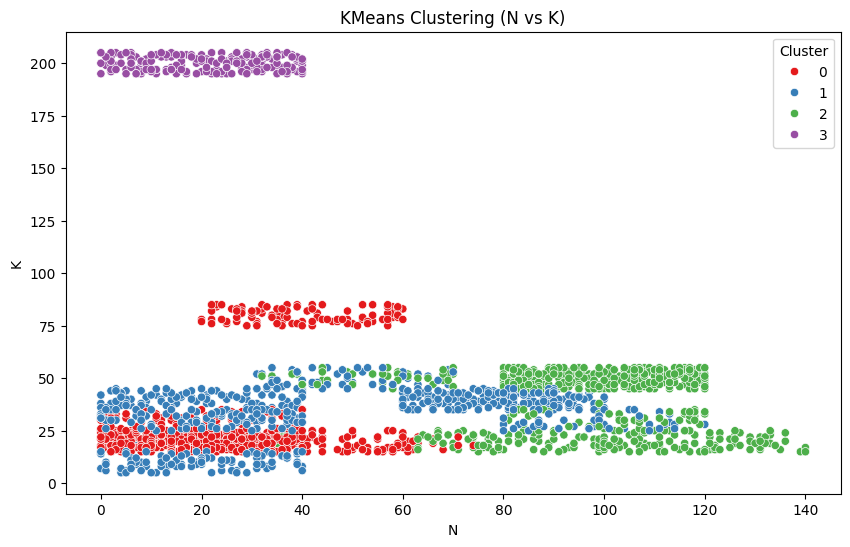

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["N"], y=df["K"], hue=df["Cluster"], palette="Set1")
plt.title("KMeans Clustering (N vs K)")
plt.show()

In [31]:
cluster_summary = df.groupby("Cluster")["label"].value_counts()
print(cluster_summary)

Cluster  label      
0        blackgram      100
         chickpea       100
         kidneybeans    100
         lentil         100
         mango          100
         mothbeans      100
         mungbean        91
         pigeonpeas      88
         maize           18
1        coconut        100
         orange         100
         pomegranate    100
         rice           100
         jute            99
         papaya          60
         coffee          47
         pigeonpeas      12
2        banana         100
         cotton         100
         muskmelon      100
         watermelon     100
         maize           82
         coffee          53
         papaya          40
         mungbean         9
         jute             1
3        apple          100
         grapes         100
Name: count, dtype: int64
